# Wine Quality Prediction using Classification Models

## Table of Content

1. Problem Statement<br>
2. Data Loading and Description<br>
3. Exploratory Data Analysis<br>
4. Splitting the Data<br>
5. Model evaluation<br>
6. Conclusion

## 1.Problem Statement
It is very difficult to assess the quality of wine just by reading the label. Quality is assessed best by tasting. but as we have dataset which contains different ingredient of wine and also we have Quality of Wine column. So based on that we will try to find out what should be level of varous ingredients to get the best quality of wine.



In [2]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas.testing as tm
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data Loading and Description

The quality of a wine is determined by 11 input variables:
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulfates
11. Alcohol

Objective : Find out what should be level of varous ingredients to get the best quality of wine

#### Importing the Dataset

In [3]:
df_wine=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df_wine.shape

(6497, 12)

## 3. Exploratory Data Analysis

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [7]:
from pandas_profiling import ProfileReport
report = ProfileReport(df_wine)
report.to_file(output_file="profilereport.html")

In [8]:
print(df_wine.isna().sum()) #Print count of Missing Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
df_wine.duplicated().sum()

1179

In [10]:
df_wine[df_wine['citric acid'] == 0]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          0.0             1.9      0.076   
1               7.8             0.880          0.0             2.6      0.098   
4               7.4             0.700          0.0             1.9      0.076   
5               7.4             0.660          0.0             1.8      0.075   
7               7.3             0.650          0.0             1.2      0.065   
...             ...               ...          ...             ...        ...   
5897            5.6             0.260          0.0            10.2      0.038   
6196            6.7             0.660          0.0            13.0      0.033   
6378            6.0             0.590          0.0             0.8      0.037   
6391            4.7             0.785          0.0             3.4      0.036   
6476            5.9             0.540          0.0             0.8      0.032   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
7                    15.0                  21.0  0.99460  3.39       0.47   
...                   ...                   ...      ...   ...        ...   
5897                 13.0                 111.0  0.99315  3.44       0.46   
6196                 32.0                  75.0  0.99551  3.15       0.50   
6378                 30.0                  95.0  0.99032  3.10       0.40   
6391                 23.0                 134.0  0.98981  3.53       0.92   
6476                 12.0                  82.0  0.99286  3.25       0.36   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
4         9.4        5  
5         9.4        5  
7        10.0        7  
...       ...      ...  
5897     12.4        6  
6196     10.7        6  
6378     10.9        4  
6391     13.8        6  
6476      8.8        5  

[151 rows x 12 columns]

Since citric acid is an important component of Wine, it cannot be 0. So replacing the 0 values with mean to make a meaningful data

In [11]:
#Replace all 0 values with mean
df_wine['citric acid'] = df_wine['citric acid'].replace(0,df_wine['citric acid'].mean())

In [12]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.326039        5.443235   
std         1.296434          0.164636     0.136757        4.757804   
min         3.800000          0.080000     0.010000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.318633        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

There are 6497 **observations**, and also can be seen from the info() function that all columns have values, and the dataset looks to be clean with no null values either. Zeroes in citric Acid have been replaced with the mean and the duplicate rows are being retained so that the data set remains unbalanced as it is. 

In [13]:
df_wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

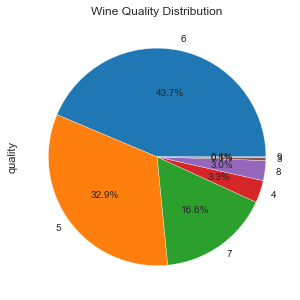

In [14]:
plt.figure(1, figsize=(5,5))
df_wine['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Wine Quality Distribution');

In [15]:
from pandas_profiling import ProfileReport
report = ProfileReport(df_wine)
report.to_file(output_file="postprofilereport.html")

__Distribution of Features__

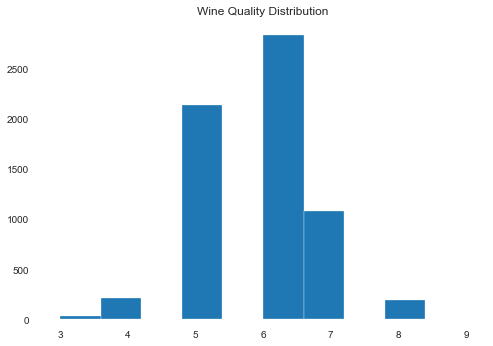

In [16]:
plt.hist(df_wine['quality']);
plt.title('Wine Quality Distribution');

__Correlation Matrix and Heatmap__

In [17]:
df_wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.328862   
volatile acidity           0.219008          1.000000    -0.293782   
citric acid                0.328862         -0.293782     1.000000   
residual sugar            -0.111981         -0.196011     0.116734   
chlorides                  0.298195          0.377124     0.075367   
free sulfur dioxide       -0.282735         -0.352557     0.100068   
total sulfur dioxide      -0.329054         -0.414476     0.136840   
density                    0.458910          0.271296     0.116331   
pH                        -0.252700          0.261454    -0.274685   
sulphates                  0.299568          0.225984     0.081742   
alcohol                   -0.095452         -0.037640    -0.008132   
quality                   -0.076743         -0.265699     0.063131   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.116734   0.075367             0.100068   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.136840  0.116331 -0.274685   0.081742   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.008132  0.063131  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

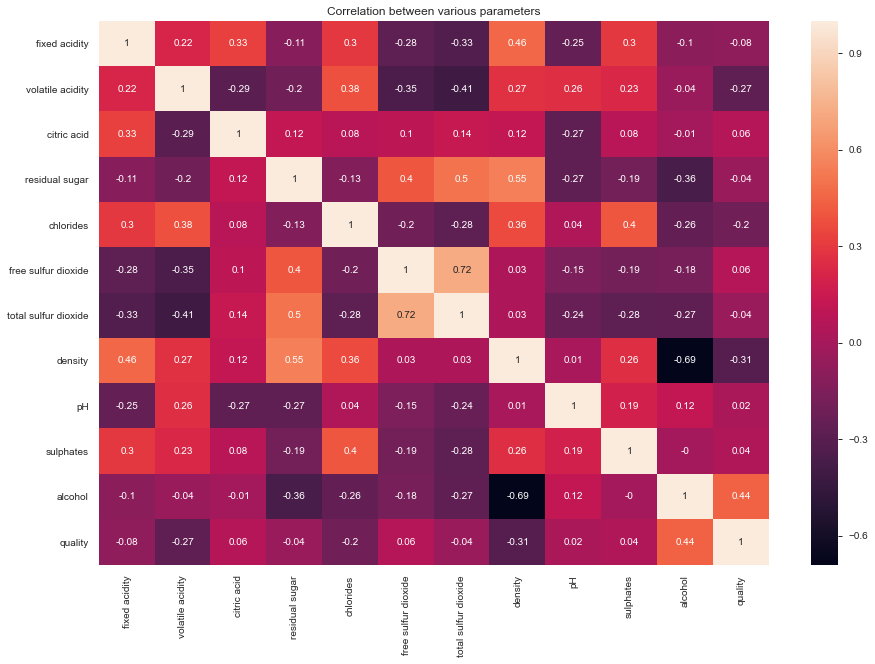

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df_wine.corr(),2),annot=True)
plt.title('Correlation between various parameters')
plt.show()


From the heatmap, it can be seen that quality has highest correlation with density, volatile acidity, chlorides, and alcohol

### Convert to a Classification Problem

From the data, it can be seen that Each wine in this dataset is given a “quality” score between 0 and 10. 

Our objective is to compare the effectiveness of different classification techniques, so I needed to change the output variable a binary format.
For this project, I converted the output to a binary output where each wine is either “good quality” (a score of 6 or higher) or not (a score below 6). 


In [19]:
# Create Classification version of target variable
df_wine['goodquality'] = [1 if x >= 6 else 0 for x in df_wine['quality']]

In [20]:
# Separate feature variables and target variable
X = df_wine.drop(['quality','goodquality'], axis = 1)
y = df_wine['goodquality']

In [21]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70     0.318633             1.9      0.076   
1            7.8              0.88     0.318633             2.6      0.098   
2            7.8              0.76     0.040000             2.3      0.092   
3           11.2              0.28     0.560000             1.9      0.075   
4            7.4              0.70     0.318633             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

__Proportion of Good vs Bad Wines__


In [22]:
y.value_counts()

1    4113
0    2384
Name: goodquality, dtype: int64

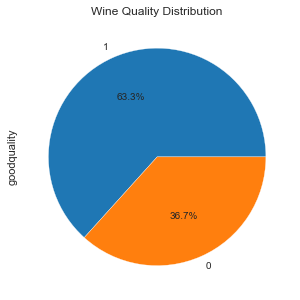

In [23]:
plt.figure(1, figsize=(5,5))
y.value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Wine Quality Distribution');

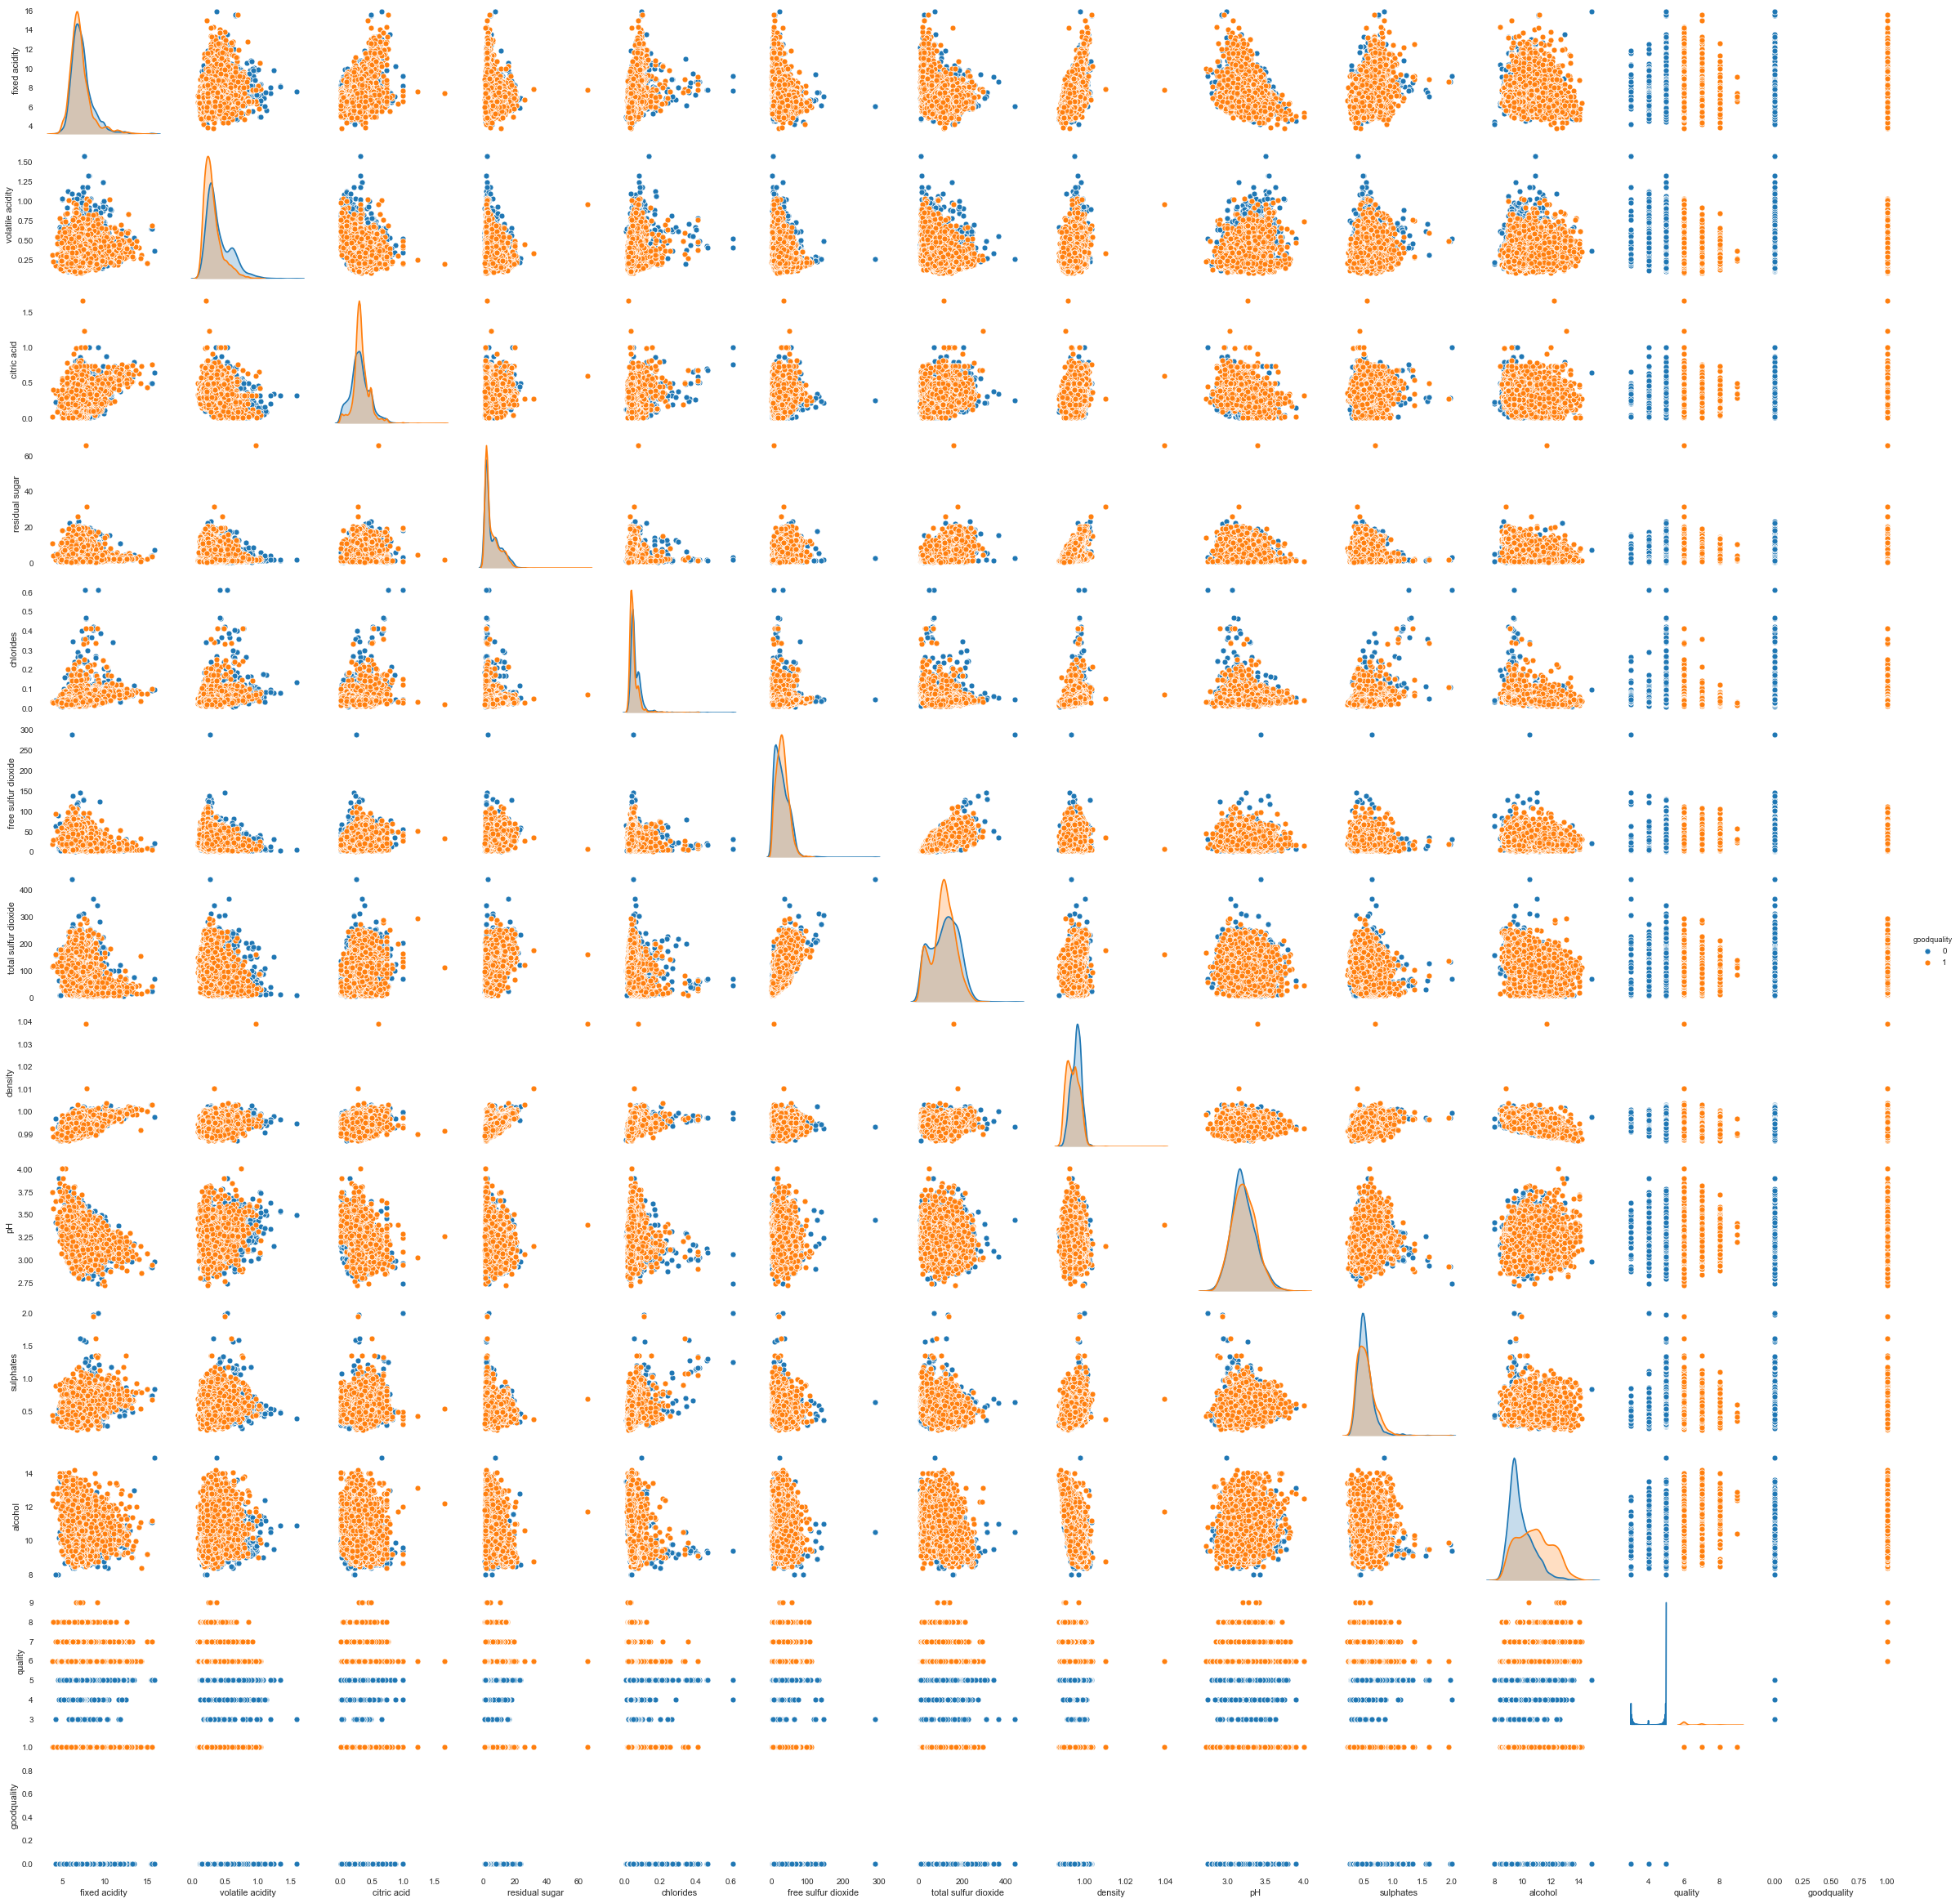

In [24]:
# Seaborn pairplot
sns_plot = sns.pairplot(df_wine, hue = 'goodquality')
plt.show()

## 4. Training and Testing the Model

### 4.1 Normalise Feature Variables using standard scaler

In [25]:

from sklearn.preprocessing import StandardScaler
X_features = X
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
             'total sulfur dioxide','density','pH','sulphates','alcohol']
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -0.054155       -0.744778   0.569958   
1       0.451036          3.282235    -0.054155       -0.597640   1.197975   
2       0.451036          2.553300    -2.091748       -0.660699   1.026697   
3       3.073817         -0.362438     1.710915       -0.744778   0.541412   
4       0.142473          2.188833    -0.054155       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  
0 -0.915464  
1 -0.580068  
2 -0.580068  
3 -0.580068  
4 -0.915464

### 4.2 Splitting data into training and test datasets. 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [27]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (4872, 11)
y_train shape:  (4872,)

Test cases as below
X_test shape:  (1625, 11)
y_test shape:  (1625,)


In [28]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3731      -0.088949         -0.726906    -0.044160        2.408180  -0.000967   
1651      -0.783214         -1.091373     0.028968       -0.912936   0.027580   
5060      -0.397511         -0.605417    -0.190416       -0.334894  -0.400614   
1303       0.605317         -0.362438     0.833377       -0.765798   0.712689   
474        2.533832         -0.362438     1.345274       -0.786818   0.684143   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3731             1.040942              0.747652  1.702006  0.942306   
1651            -0.536697             -0.597064 -1.232851  0.631312   
5060             4.196221              1.119218 -0.936031 -1.110254   
1303            -0.142287             -0.844775  0.104510  0.880108   
474             -1.156484             -1.623295  1.168395 -0.115073   

      sulphates   alcohol  
3731  -1.016626 -0.747766  
1651  -0.478971  0.342271  
5060   0.394717  0.677667  
1303   0.865165  0.593818  
474    2.410922 -0.915464

### 4.3 Modelling

#### 4.3.1 Model 1 : Decision Tree

In [29]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(random_state=15)
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)
print(classification_report(y_test, y_predDT,target_names = ['Bad Quality', 'Good Quality']))

              precision    recall  f1-score   support

 Bad Quality       0.68      0.69      0.69       597
Good Quality       0.82      0.82      0.82      1028

    accuracy                           0.77      1625
   macro avg       0.75      0.75      0.75      1625
weighted avg       0.77      0.77      0.77      1625



#### 4.3.2 Model 2 : Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=15)
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)
print(classification_report(y_test, y_predRF, target_names = ['Bad Quality', 'Good Quality']))

              precision    recall  f1-score   support

 Bad Quality       0.75      0.74      0.75       597
Good Quality       0.85      0.86      0.85      1028

    accuracy                           0.81      1625
   macro avg       0.80      0.80      0.80      1625
weighted avg       0.81      0.81      0.81      1625



##### Model evaluation using Precision score

In [31]:
from sklearn.metrics import precision_score
print('Precision score for test data is:', precision_score(y_test,y_predRF))

Precision score for test data is: 0.851063829787234


#### 4.3.3 Model 3 : Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
def log():
    logreg = LogisticRegression(random_state=15)
    return logreg
logreg = log()

In [33]:
def log():
    logreg.fit(X_train,y_train)
log()    

In [34]:
y_pred_trainLogReg = pd.DataFrame()
def log():
    y_pred_trainLogReg = logreg.predict(X_train)
    return y_pred_trainLogReg
y_pred_trainLogReg = log()

In [35]:
y_pred_testLogReg = pd.DataFrame()
def log():
    y_pred_testLogReg = logreg.predict(X_test)
    return y_pred_testLogReg
y_pred_testLogReg = log()

In [36]:
from sklearn.metrics import accuracy_score
def log():
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testLogReg))
log()

Accuracy score for test data is: 0.7249230769230769


In [37]:
print(classification_report(y_test, y_pred_testLogReg, target_names = ['Bad Quality', 'Good Quality']))

              precision    recall  f1-score   support

 Bad Quality       0.65      0.53      0.59       597
Good Quality       0.76      0.84      0.79      1028

    accuracy                           0.72      1625
   macro avg       0.70      0.68      0.69      1625
weighted avg       0.72      0.72      0.72      1625



## 5. Model Evaluation

Logistic Regression (accuracy): 74.241088 (0.019605)
Logistic Regression (recall): 83.962818 (0.018562)
Logistic Regression(precision): 77.331182 (0.019983)
Logistic Regression(f1score): 71.270012 (0.021892) 

CART (accuracy): 76.539494 (0.012540)
CART (recall): 81.314751 (0.018404)
CART(precision): 81.287680 (0.015200)
CART(f1score): 74.921041 (0.015383) 

Random Forest Classifier (accuracy): 80.439290 (0.019082)
Random Forest Classifier (recall): 84.398222 (0.019973)
Random Forest Classifier(precision): 85.276336 (0.024168)
Random Forest Classifier(f1score): 79.782070 (0.018375) 



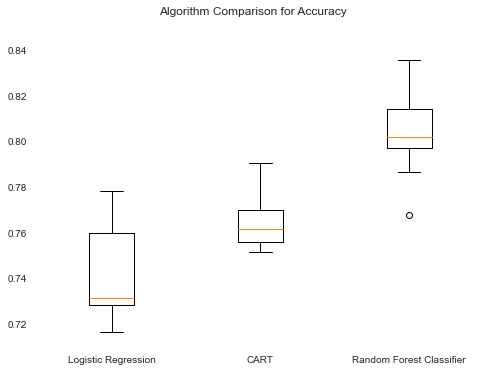

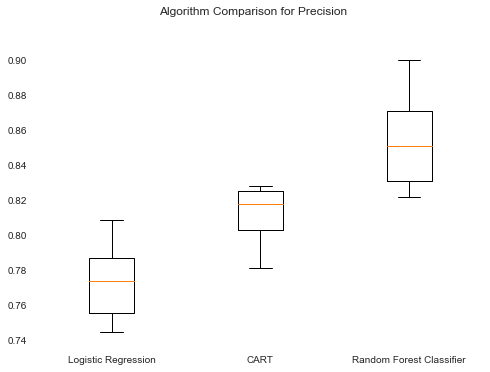

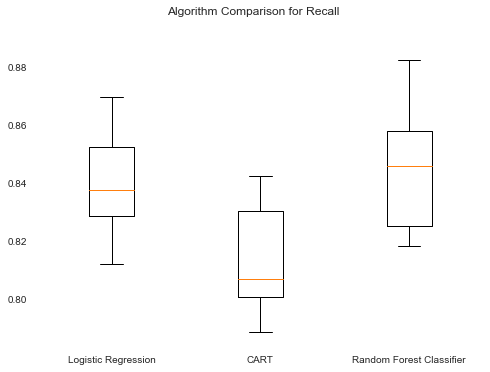

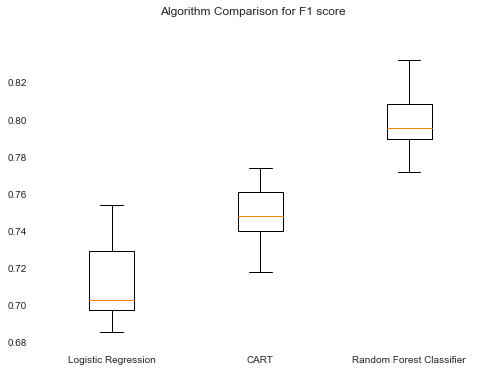

In [38]:
from sklearn import model_selection
models = []
seed = 15
models.append(('Logistic Regression', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
# evaluate each model in turn
results_precision = []
results_recall = []
results_accuracy = []
results_f1score = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_accuracy = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_recall = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    cv_precision =  model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    cv_f1score =  model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')
    results_accuracy.append(cv_accuracy)
    results_precision.append(cv_precision)
    results_recall.append(cv_recall)
    results_f1score.append(cv_f1score)
    names.append(name)
    msg = "%s (accuracy): %f (%f)" % (name, cv_accuracy.mean()*100, cv_accuracy.std())
    print(msg)
    msg = "%s (recall): %f (%f)" % (name, cv_recall.mean()*100, cv_recall.std())
    print(msg)
    msg = "%s(precision): %f (%f)" % (name, cv_precision.mean()*100, cv_precision.std())
    print(msg)
    msg = "%s(f1score): %f (%f) \n" % (name, cv_f1score.mean()*100, cv_f1score.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison for Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results_accuracy)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure()
fig.suptitle('Algorithm Comparison for Precision')
ax = fig.add_subplot(111)
plt.boxplot(results_precision)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure()
fig.suptitle('Algorithm Comparison for Recall')
ax = fig.add_subplot(111)
plt.boxplot(results_recall)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure()
fig.suptitle('Algorithm Comparison for F1 score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1score)
ax.set_xticklabels(names)
plt.show();

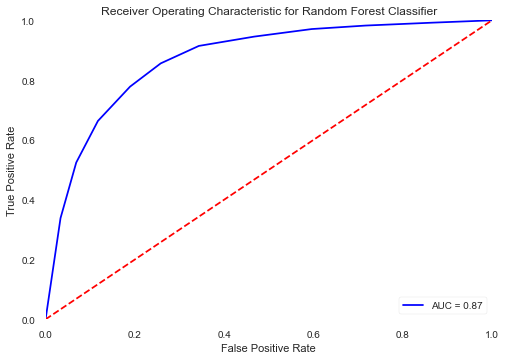

In [39]:
from sklearn import metrics
probs = modelRF.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

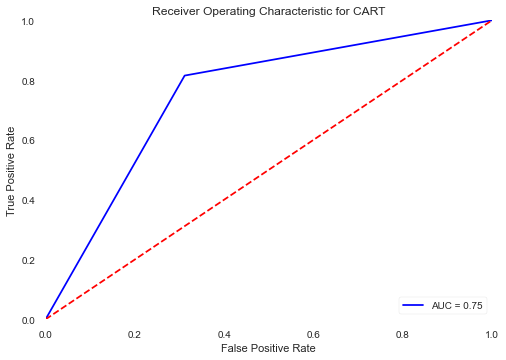

In [40]:
from sklearn import metrics
probs = modelDT.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for CART')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

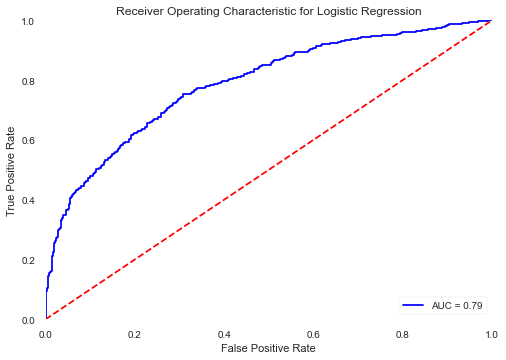

In [41]:
from sklearn import metrics
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It can be seen that __Random Forest__ is the best model for this dataset as precision is highest for Good Quality using this model and our objective is to make the best wine possible. Also this model has the highest accuracy

## Which are the important features?

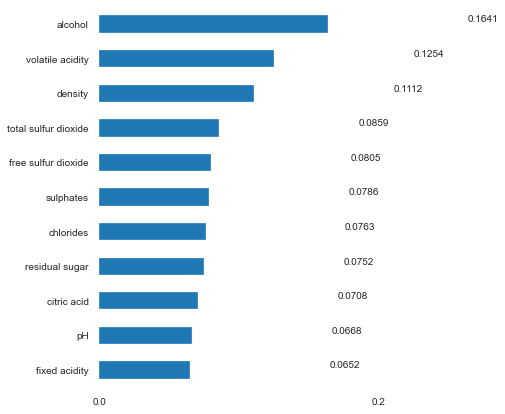

In [42]:
imp_features = pd.Series(modelRF.feature_importances_, index=X.columns)
ax = imp_features.nsmallest(12).plot(kind='barh',figsize=(5,7));
ax.set_xticks([0, 0.2])
#set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 4)), fontsize=10)


In [43]:
imp_features.sort_values()

fixed acidity           0.065209
pH                      0.066801
citric acid             0.070830
residual sugar          0.075187
chlorides               0.076285
sulphates               0.078597
free sulfur dioxide     0.080488
total sulfur dioxide    0.085880
density                 0.111222
volatile acidity        0.125432
alcohol                 0.164069
dtype: float64

We can see that the 4 most important features are alcohol, density, total sulfur dioxide and sulphates as per Random Forest Classifier Model

In [44]:
# Filtering df for only good quality
df_temp1 = df_wine[df_wine['goodquality']==1]
df_temp1 [['alcohol', 'density', 'volatile acidity','total sulfur dioxide']].describe()

alcohol      density  volatile acidity  total sulfur dioxide
count  4113.000000  4113.000000       4113.000000           4113.000000
mean     10.850158     0.994083          0.306196            113.697058
std       1.219279     0.003108          0.138888             53.064708
min       8.400000     0.987110          0.080000              6.000000
25%       9.900000     0.991600          0.210000             82.000000
50%      10.800000     0.993880          0.270000            116.000000
75%      11.800000     0.996400          0.360000            150.000000
max      14.200000     1.038980          1.040000            294.000000

In [45]:
# Filtering df for only bad quality
df_temp2 = df_wine[df_wine['goodquality']==0]
df_temp2[['alcohol', 'density', 'volatile acidity','total sulfur dioxide']].describe()

alcohol      density  volatile acidity  total sulfur dioxide
count  2384.000000  2384.000000       2384.000000           2384.000000
mean      9.873544     0.995756          0.397410            119.277055
std       0.841746     0.002464          0.187971             61.887639
min       8.000000     0.987220          0.100000              6.000000
25%       9.300000     0.993960          0.260000             68.000000
50%       9.600000     0.996000          0.337500            124.000000
75%      10.400000     0.997540          0.500000            167.000000
max      14.900000     1.003150          1.580000            440.000000

By looking into the details, we can see that good quality wines have 
1. alcohol : Higher levels of alcohol on average for good quality compared to bad quality
2. density : Lower levels of density on average for good quality compared to bad quality
3. volatile acidity : Lesser volatile acidity on Average for good quality compared to bad quality
4. total sulfur dioxide : Lower levels for good quality compared to bad quality


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8247210132264348

# 5. Conclusion for Original Wine Dataset

1. The best model to predict the quality of Wine is Random Forest Classifier amongst Decision Tree, Logistic Regression and Random Forest Classifier for the below reasons: 
    1. Precision is highest for Good Quality using this model and our objective is to make the best wine possible. 
    2. Highest accuracy 
    3. Highest F1 score and AUC
    4. High Recall
2. Using this model, the important features are: alcohol, volatile acidity,density and total sulfur dioxide

# Modeling for the Modified Data Set after removing duplicate values

#### Importing the Dataset

In [47]:
winedata=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
winedata.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [48]:
winedata.shape

(6497, 12)

## 3. Exploratory Data Analysis

In [49]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [50]:
winedata.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [51]:
from pandas_profiling import ProfileReport
report = ProfileReport(winedata)
report.to_file(output_file="profilereport.html")

In [52]:
print(winedata.isna().sum()) #Print count of Missing Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [53]:
winedata.duplicated().sum()

1179

In [54]:
winedata.drop_duplicates(keep=False,inplace=True) 

In [55]:
winedata.duplicated().sum()

0

In [56]:
winedata.shape

(4325, 12)

In [57]:
winedata.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4325.000000       4325.000000  4325.000000     4325.000000   
mean        7.207549          0.347446     0.317847        4.719087   
std         1.336193          0.172474     0.148348        4.265530   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.230000     0.240000        1.700000   
50%         6.900000          0.300000     0.310000        2.600000   
75%         7.700000          0.415000     0.400000        6.800000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4325.000000          4325.000000           4325.000000  4325.000000   
mean      0.057452            29.616763            112.920116     0.994398   
std       0.038814            17.850070             57.219274     0.002926   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             72.000000     0.992100   
50%       0.047000            27.000000            114.000000     0.994440   
75%       0.067000            40.000000            152.000000     0.996600   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4325.000000  4325.000000  4325.000000  4325.000000  
mean      3.230210     0.535720    10.596477     5.779653  
std       0.160141     0.150539     1.178467     0.891813  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.120000     0.440000     9.600000     5.000000  
50%       3.220000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [58]:
winedata[winedata['citric acid'] == 0]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1               7.8             0.880          0.0             2.6      0.098   
5               7.4             0.660          0.0             1.8      0.075   
7               7.3             0.650          0.0             1.2      0.065   
12              5.6             0.615          0.0             1.6      0.089   
28              7.1             0.710          0.0             1.9      0.080   
...             ...               ...          ...             ...        ...   
5897            5.6             0.260          0.0            10.2      0.038   
6196            6.7             0.660          0.0            13.0      0.033   
6378            6.0             0.590          0.0             0.8      0.037   
6391            4.7             0.785          0.0             3.4      0.036   
6476            5.9             0.540          0.0             0.8      0.032   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                    25.0                  67.0  0.99680  3.20       0.68   
5                    13.0                  40.0  0.99780  3.51       0.56   
7                    15.0                  21.0  0.99460  3.39       0.47   
12                   16.0                  59.0  0.99430  3.58       0.52   
28                   14.0                  35.0  0.99720  3.47       0.55   
...                   ...                   ...      ...   ...        ...   
5897                 13.0                 111.0  0.99315  3.44       0.46   
6196                 32.0                  75.0  0.99551  3.15       0.50   
6378                 30.0                  95.0  0.99032  3.10       0.40   
6391                 23.0                 134.0  0.98981  3.53       0.92   
6476                 12.0                  82.0  0.99286  3.25       0.36   

      alcohol  quality  
1         9.8        5  
5         9.4        5  
7        10.0        7  
12        9.9        5  
28        9.4        5  
...       ...      ...  
5897     12.4        6  
6196     10.7        6  
6378     10.9        4  
6391     13.8        6  
6476      8.8        5  

[123 rows x 12 columns]

In [59]:
winedata.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4325.000000       4325.000000  4325.000000     4325.000000   
mean        7.207549          0.347446     0.317847        4.719087   
std         1.336193          0.172474     0.148348        4.265530   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.230000     0.240000        1.700000   
50%         6.900000          0.300000     0.310000        2.600000   
75%         7.700000          0.415000     0.400000        6.800000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4325.000000          4325.000000           4325.000000  4325.000000   
mean      0.057452            29.616763            112.920116     0.994398   
std       0.038814            17.850070             57.219274     0.002926   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             72.000000     0.992100   
50%       0.047000            27.000000            114.000000     0.994440   
75%       0.067000            40.000000            152.000000     0.996600   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4325.000000  4325.000000  4325.000000  4325.000000  
mean      3.230210     0.535720    10.596477     5.779653  
std       0.160141     0.150539     1.178467     0.891813  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.120000     0.440000     9.600000     5.000000  
50%       3.220000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Since citric acid is an important component of Wine, it cannot be 0. So replacing the 0 values with mean to make a meaningful data

In [60]:
#Replace all 0 values with mean
winedata['citric acid'] = winedata['citric acid'].replace(0,winedata['citric acid'].mean())

There are 4325 **observations**, and also can be seen from the info() function that all columns have values, and the dataset looks to be clean with no null values either. Zeroes in citric Acid have been replaced with the mean and the duplicate rows are removed

In [61]:
winedata['quality'].value_counts()

6    1889
5    1403
7     687
4     196
8     115
3      30
9       5
Name: quality, dtype: int64

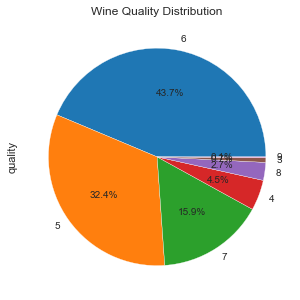

In [62]:
plt.figure(1, figsize=(5,5))
winedata['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Wine Quality Distribution');

In [63]:
from pandas_profiling import ProfileReport
report = ProfileReport(winedata)
report.to_file(output_file="postremoveduplicatesprofilereport.html")

__Distribution of Features__

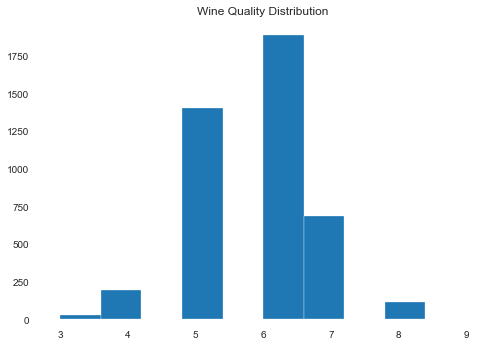

In [64]:
plt.hist(winedata['quality'])
plt.title('Wine Quality Distribution');

__Correlation Matrix and Heatmap__

In [65]:
winedata.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.207683     0.346654   
volatile acidity           0.207683          1.000000    -0.292616   
citric acid                0.346654         -0.292616     1.000000   
residual sugar            -0.097481         -0.141330     0.116624   
chlorides                  0.279087          0.355534     0.113121   
free sulfur dioxide       -0.276100         -0.344337     0.086474   
total sulfur dioxide      -0.318172         -0.387739     0.125112   
density                    0.493769          0.333814     0.116991   
pH                        -0.287868          0.238554    -0.299020   
sulphates                  0.311438          0.228214     0.093140   
alcohol                   -0.108863         -0.084508     0.005939   
quality                   -0.084162         -0.274290     0.086026   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.097481   0.279087            -0.276100   
volatile acidity           -0.141330   0.355534            -0.344337   
citric acid                 0.116624   0.113121             0.086474   
residual sugar              1.000000  -0.119155             0.396705   
chlorides                  -0.119155   1.000000            -0.177355   
free sulfur dioxide         0.396705  -0.177355             1.000000   
total sulfur dioxide        0.485822  -0.257994             0.719628   
density                     0.492207   0.376125            -0.007289   
pH                         -0.209715   0.003744            -0.141856   
sulphates                  -0.164507   0.414923            -0.205560   
alcohol                    -0.251911  -0.280052            -0.163862   
quality                    -0.057953  -0.201630             0.055137   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.318172  0.493769 -0.287868   0.311438   
volatile acidity                 -0.387739  0.333814  0.238554   0.228214   
citric acid                       0.125112  0.116991 -0.299020   0.093140   
residual sugar                    0.485822  0.492207 -0.209715  -0.164507   
chlorides                        -0.257994  0.376125  0.003744   0.414923   
free sulfur dioxide               0.719628 -0.007289 -0.141856  -0.205560   
total sulfur dioxide              1.000000 -0.008135 -0.216889  -0.274482   
density                          -0.008135  1.000000  0.045280   0.301656   
pH                               -0.216889  0.045280  1.000000   0.140162   
sulphates                        -0.274482  0.301656  0.140162   1.000000   
alcohol                          -0.238392 -0.650742  0.083219  -0.028927   
quality                          -0.047891 -0.330382  0.047593   0.037487   

                       alcohol   quality  
fixed acidity        -0.108863 -0.084162  
volatile acidity     -0.084508 -0.274290  
citric acid           0.005939  0.086026  
residual sugar       -0.251911 -0.057953  
chlorides            -0.280052 -0.201630  
free sulfur dioxide  -0.163862  0.055137  
total sulfur dioxide -0.238392 -0.047891  
density              -0.650742 -0.330382  
pH                    0.083219  0.047593  
sulphates            -0.028927  0.037487  
alcohol               1.000000  0.471565  
quality               0.471565  1.000000

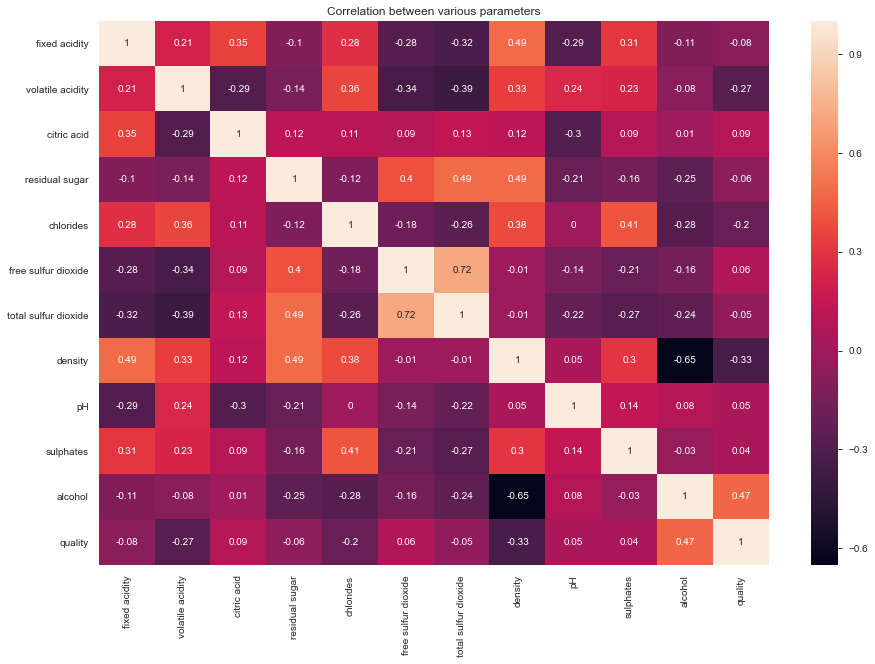

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(round(winedata.corr(),2),annot=True)
plt.title('Correlation between various parameters')
plt.show()

From the heatmap, it can be seen that quality has highest correlation with density, volatile acidity, chlorides, and alcohol

## Convert to a Classification Problem
Our objective is to compare the effectiveness of different classification techniques, so I needed to change the output variable to a binary output.
For this problem, I defined a bottle of wine as ‘good quality’ (1) if it had a quality score of 6 or higher, and if it had a score of less than 6, it was deemed ‘bad quality’(0)


In [67]:
# Create Classification version of target variable
winedata['goodquality'] = [1 if x >= 6 else 0 for x in winedata['quality']]


In [68]:
# Separate feature variables and target variable
X = winedata.drop(['quality','goodquality'], axis = 1)
y = winedata['goodquality']

In [69]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88     0.317847             2.6      0.098   
2            7.8              0.76     0.040000             2.3      0.092   
3           11.2              0.28     0.560000             1.9      0.075   
5            7.4              0.66     0.317847             1.8      0.075   
6            7.9              0.60     0.060000             1.6      0.069   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol  
1      9.8  
2      9.8  
3      9.8  
5      9.4  
6      9.4

In [70]:
y.head()

1    0
2    0
3    1
5    0
6    0
Name: goodquality, dtype: int64

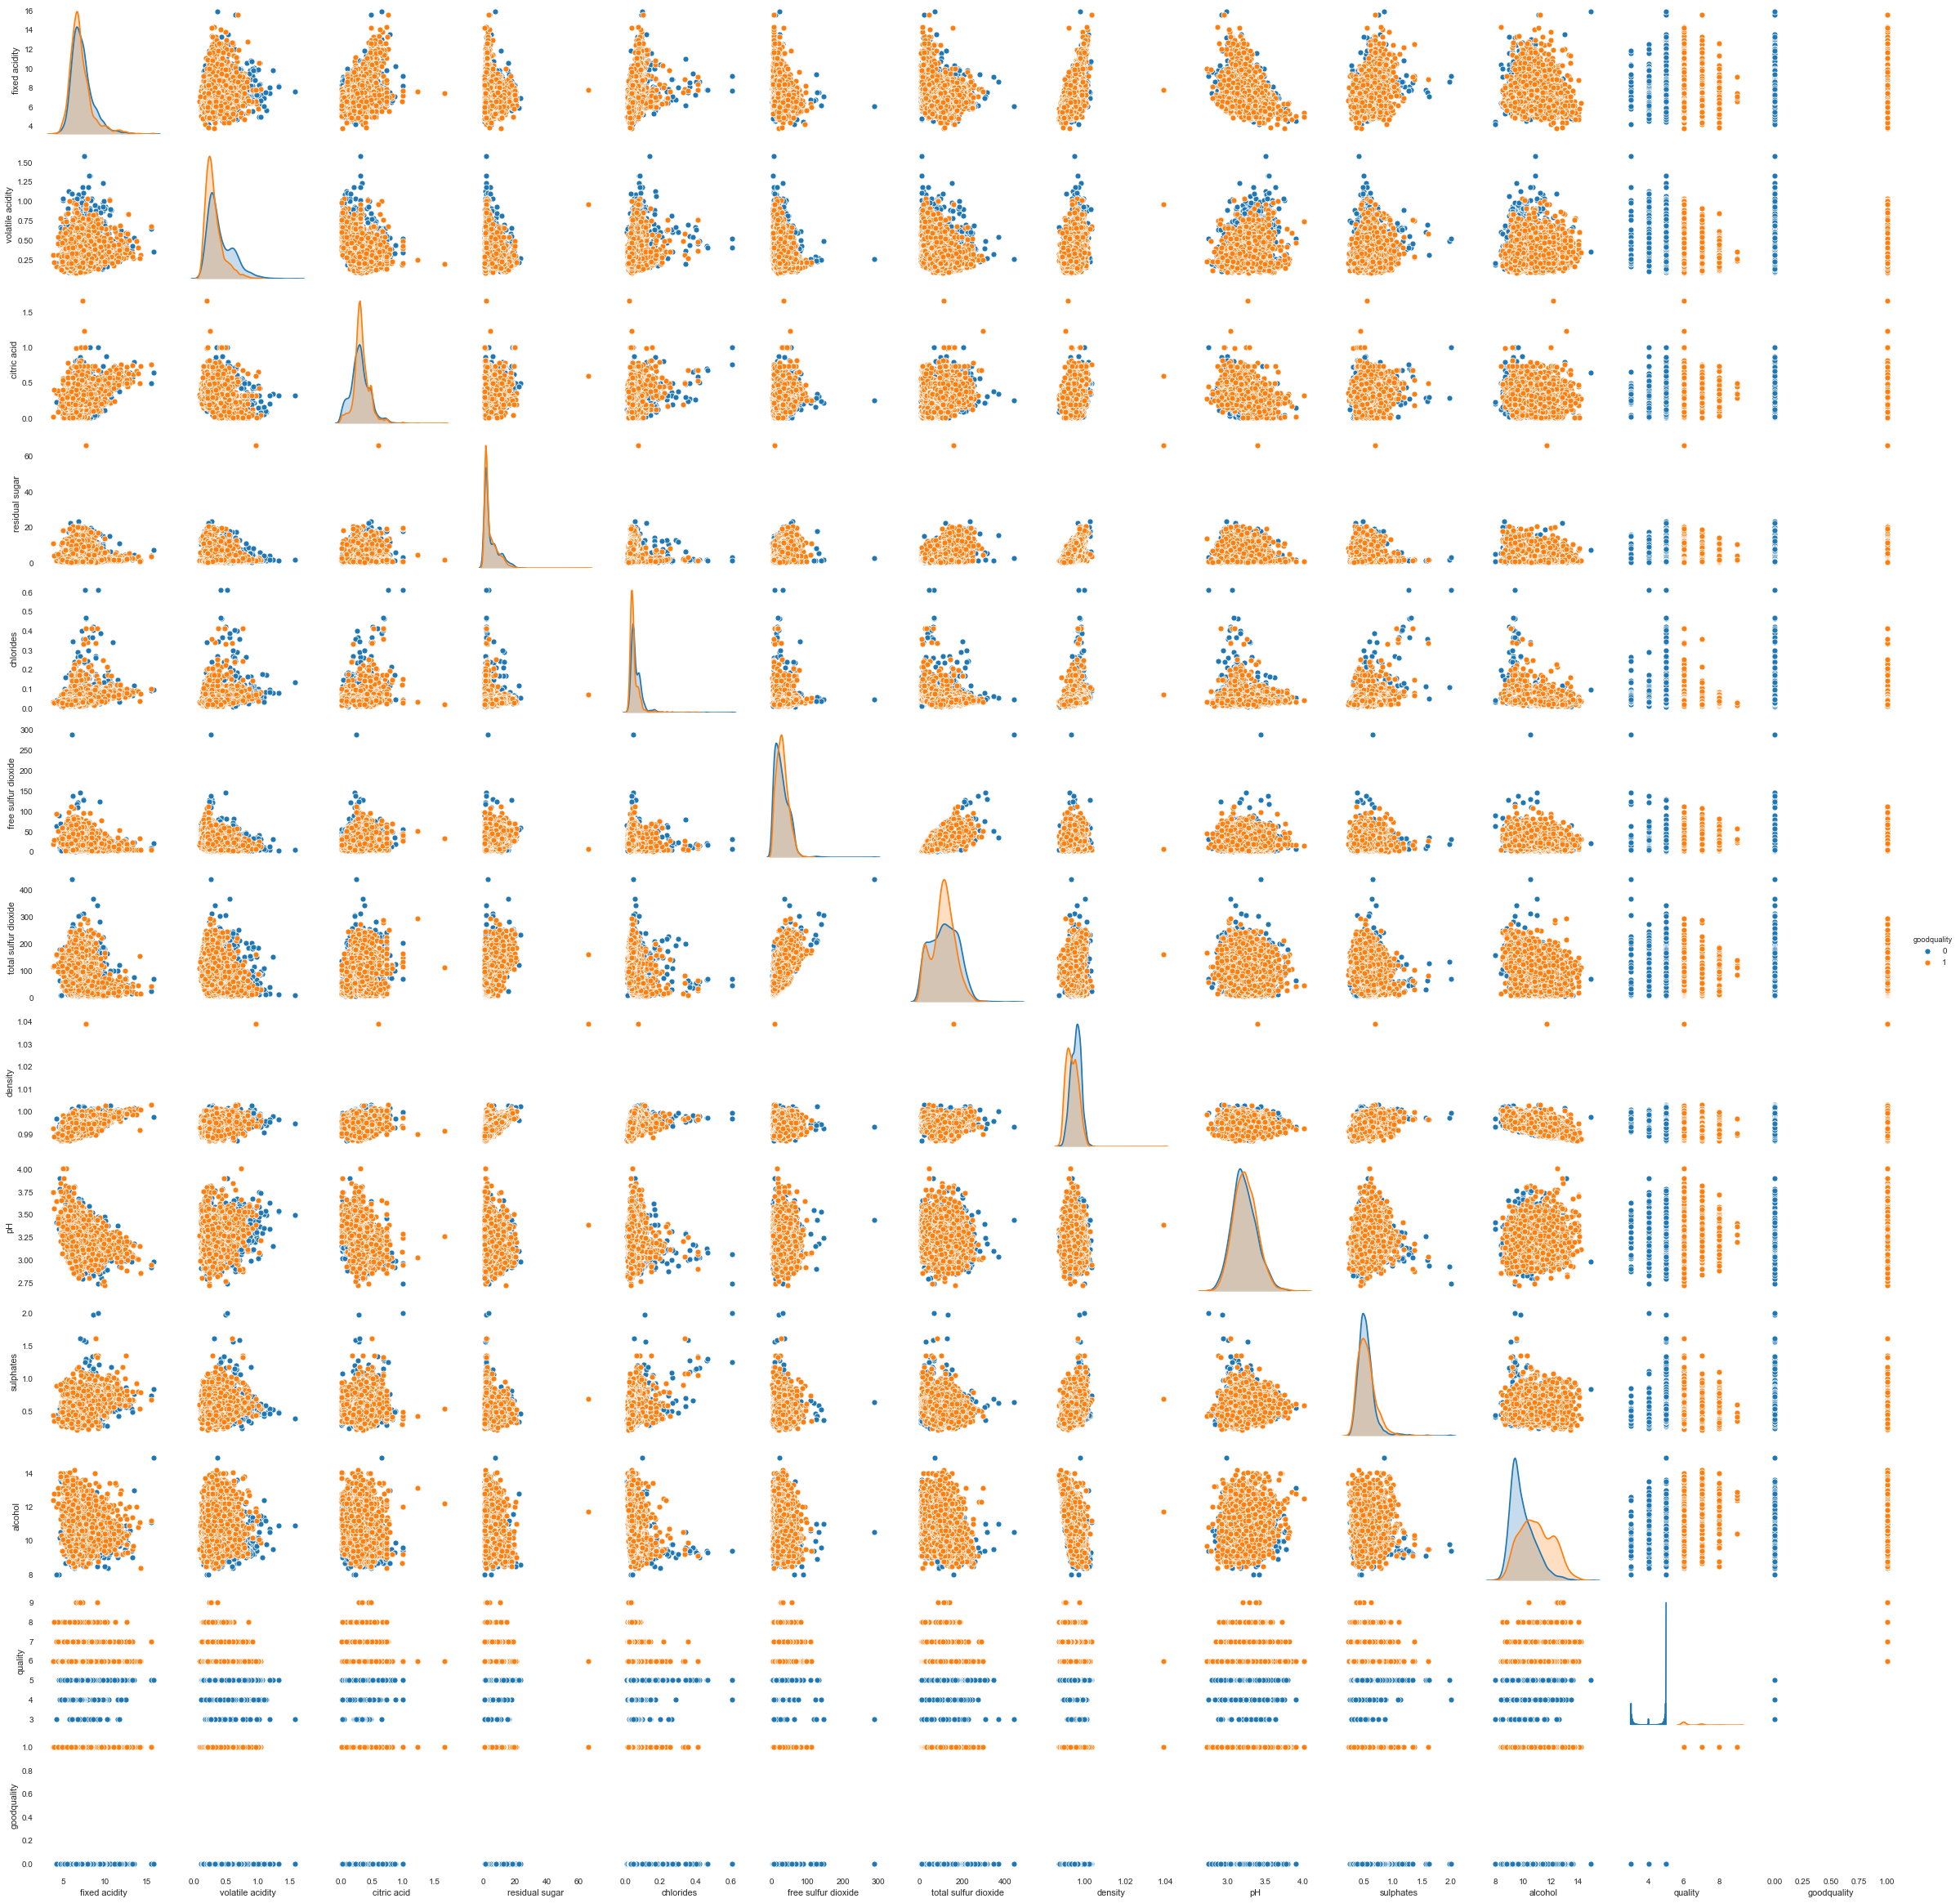

In [71]:
# Seaborn pairplot
sns_plot = sns.pairplot(winedata, hue = 'goodquality')
plt.show()

__Proportion of Good vs Bad Wines__


In [72]:
y.value_counts()

1    2696
0    1629
Name: goodquality, dtype: int64

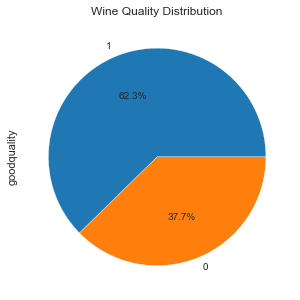

In [73]:
plt.figure(1, figsize=(5,5))
y.value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Wine Quality Distribution');

## 4. Training and Testing the Model

### 4.1 Normalise Feature Variables using standard scaler

In [74]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
             'total sulfur dioxide','density','pH','sulphates','alcohol']
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.443439          3.088089    -0.065497       -0.496851   1.044784   
1       0.443439          2.392252    -2.078720       -0.567190   0.890184   
2       2.988276         -0.391097     1.689089       -0.660976   0.452149   
3       0.144046          1.812388    -0.065497       -0.684422   0.452149   
4       0.518287          1.464469    -1.933804       -0.731315   0.297548   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.258671             -0.802622  0.821058 -0.188671   0.958535   
1            -0.818958             -1.029844  0.889414  0.186043   0.759227   
2            -0.706900             -0.924972  1.231197 -0.438481   0.294176   
3            -0.931015             -1.274545  1.162840  1.747353   0.161305   
4            -0.818958             -0.942451  0.684345  0.435853  -0.503054   

    alcohol  
0 -0.675937  
1 -0.675937  
2 -0.675937  
3 -1.015400  
4 -1.015400

### 4.2 Splitting data into training and test datasets. 

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [76]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (3243, 11)
y_train shape:  (3243,)

Test cases as below
X_test shape:  (1082, 11)
y_test shape:  (1082,)


In [77]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
879       -0.903828         -0.101165    -0.049900        1.918134  -0.088953   
1490       0.069198         -0.507070     0.239931        0.112757  -0.449688   
144        0.518287          0.884605     0.022558       -0.637529   0.684050   
388        1.940402         -0.565056     1.181884       -0.473404   0.787117   
4029      -1.053525          1.522455    -2.296093        0.863044  -0.423921   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
879             -1.323216              0.001396  0.451932  0.435853   
1490             0.077501              0.490798 -0.443538 -0.438481   
144             -0.818958              0.525756  0.821058 -0.188671   
388             -0.818958             -1.396896  1.299553  1.185281   
4029             0.077501             -0.155912 -1.195460  0.186043   

      sulphates   alcohol  
879    0.161305  0.766782  
1490   0.360612  0.342453  
144    0.094869 -0.930534  
388    2.420123 -0.506205  
4029   1.224278  2.930861

### 4.3 Modelling

#### 4.3.1 Model 1 : Decision Tree

In [78]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(random_state=20)
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)
print("Classification Report for Decision Tree Model is: \n\n",classification_report(y_test, y_predDT,target_names = ['Bad Quality', 'Good Quality']))

Classification Report for Decision Tree Model is: 

               precision    recall  f1-score   support

 Bad Quality       0.62      0.58      0.60       413
Good Quality       0.75      0.78      0.76       669

    accuracy                           0.70      1082
   macro avg       0.68      0.68      0.68      1082
weighted avg       0.70      0.70      0.70      1082



#### 4.3.2 Model 2 : Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=20)
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)
print("Classification Report for Random Forest Classifier Model is: \n\n",classification_report(y_test, y_predRF, target_names = ['Bad Quality', 'Good Quality']))

Classification Report for Random Forest Classifier Model is: 

               precision    recall  f1-score   support

 Bad Quality       0.66      0.67      0.67       413
Good Quality       0.79      0.79      0.79       669

    accuracy                           0.74      1082
   macro avg       0.73      0.73      0.73      1082
weighted avg       0.74      0.74      0.74      1082



#### 4.3.3 Model 3 : Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
def log():
    logreg = LogisticRegression(random_state=20)
    return logreg
logreg = log()

In [81]:
def log():
    logreg.fit(X_train,y_train)
log()    

In [82]:
y_pred_trainLogReg = pd.DataFrame()
def log():
    y_pred_trainLogReg = logreg.predict(X_train)
    return y_pred_trainLogReg
y_pred_trainLogReg = log()

In [83]:
y_pred_testLogReg = pd.DataFrame()
def log():
    y_pred_testLogReg = logreg.predict(X_test)
    return y_pred_testLogReg
y_pred_testLogReg = log()

In [84]:
from sklearn.metrics import accuracy_score
def log():
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testLogReg))
log()

Accuracy score for test data is: 0.7430683918669131


In [85]:
print("Classification Report for Logistic Regression Model is: \n\n",classification_report(y_test, y_pred_testLogReg, target_names = ['Bad Quality', 'Good Quality']))

Classification Report for Logistic Regression Model is: 

               precision    recall  f1-score   support

 Bad Quality       0.69      0.60      0.64       413
Good Quality       0.77      0.83      0.80       669

    accuracy                           0.74      1082
   macro avg       0.73      0.71      0.72      1082
weighted avg       0.74      0.74      0.74      1082



## 5. Model Evaluation

Logistic Regression (accuracy): 74.652327 (0.014255)
Logistic Regression (recall): 83.928800 (0.025965)
Logistic Regression(precision): 77.483820 (0.019526)
Logistic Regression(f1score): 72.059434 (0.018458) 

CART (accuracy): 67.839981 (0.019973)
CART (recall): 73.994293 (0.034786)
CART(precision): 74.462609 (0.037409)
CART(f1score): 65.915201 (0.026254) 

Random Forest Classifier (accuracy): 73.634853 (0.018148)
Random Forest Classifier (recall): 80.019023 (0.035961)
Random Forest Classifier(precision): 80.255414 (0.026443)
Random Forest Classifier(f1score): 72.219009 (0.020117) 



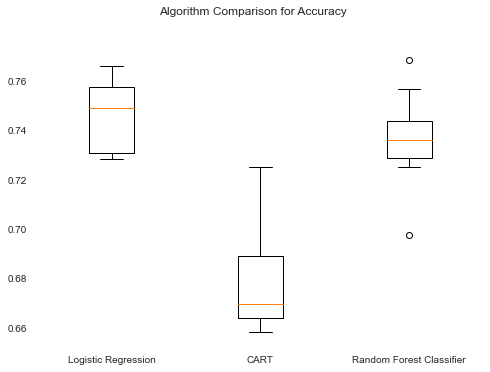

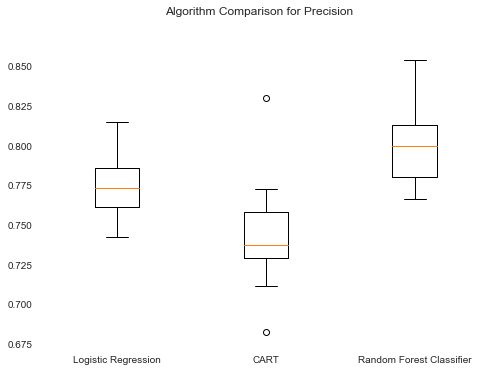

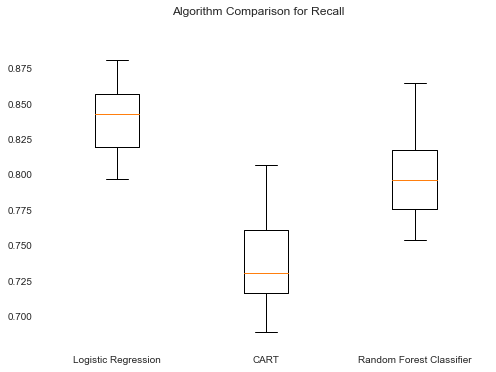

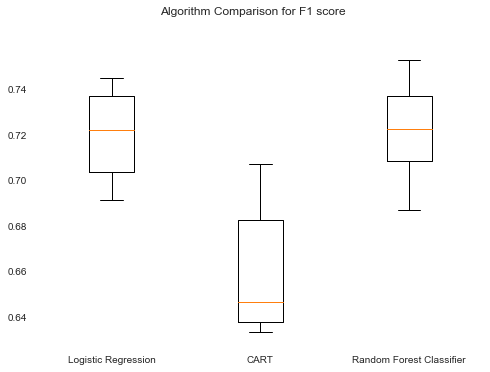

In [86]:
from sklearn import model_selection
models = []
seed = 20
models.append(('Logistic Regression', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
# evaluate each model in turn
results_precision = []
results_recall = []
results_accuracy = []
results_f1score = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_accuracy = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_recall = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    cv_precision =  model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    cv_f1score =  model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')
    results_accuracy.append(cv_accuracy)
    results_precision.append(cv_precision)
    results_recall.append(cv_recall)
    results_f1score.append(cv_f1score)
    names.append(name)
    msg = "%s (accuracy): %f (%f)" % (name, cv_accuracy.mean()*100, cv_accuracy.std())
    print(msg)
    msg = "%s (recall): %f (%f)" % (name, cv_recall.mean()*100, cv_recall.std())
    print(msg)
    msg = "%s(precision): %f (%f)" % (name, cv_precision.mean()*100, cv_precision.std())
    print(msg)
    msg = "%s(f1score): %f (%f) \n" % (name, cv_f1score.mean()*100, cv_f1score.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison for Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results_accuracy)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure()
fig.suptitle('Algorithm Comparison for Precision')
ax = fig.add_subplot(111)
plt.boxplot(results_precision)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure()
fig.suptitle('Algorithm Comparison for Recall')
ax = fig.add_subplot(111)
plt.boxplot(results_recall)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure()
fig.suptitle('Algorithm Comparison for F1 score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1score)
ax.set_xticklabels(names)
plt.show();

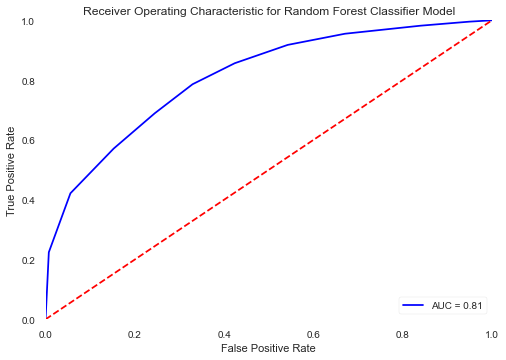

In [87]:
from sklearn import metrics
probs = modelRF.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

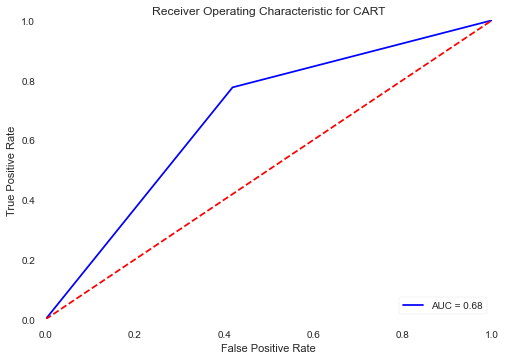

In [88]:
from sklearn import metrics
probs = modelDT.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for CART')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

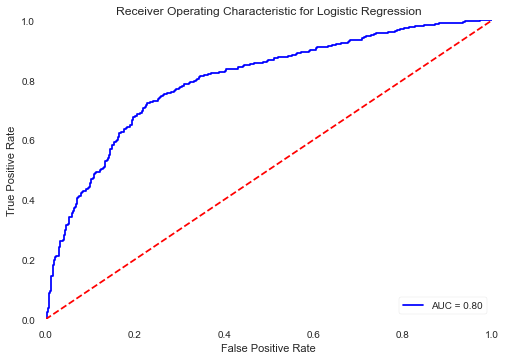

In [89]:
from sklearn import metrics
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It can be seen that __Random Forest__ is the best model for this dataset as Accuracy and precision is highest using this model and our objective is to make the best wine possible. 

## 6. Which are the important features?

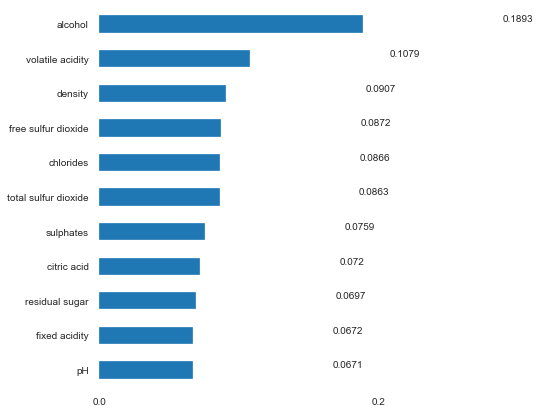

In [90]:
imp_features = pd.Series(modelRF.feature_importances_, index=X.columns)
ax = imp_features.nsmallest(12).plot(kind='barh',figsize=(5,7));
ax.set_xticks([0, 0.2])
#set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 4)), fontsize=10)


In [91]:
imp_features.sort_values()

pH                      0.067137
fixed acidity           0.067216
residual sugar          0.069708
citric acid             0.072020
sulphates               0.075929
total sulfur dioxide    0.086285
chlorides               0.086618
free sulfur dioxide     0.087193
density                 0.090713
volatile acidity        0.107912
alcohol                 0.189268
dtype: float64

We can see that the 4 most important features are alcohol, density, total sulfur dioxide and free sulfur dioxide as per Random Forest Classifier Model

In [92]:
# Filtering df for only good quality
df_temp1 = winedata[winedata['goodquality']==1]
df_temp1.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2696.000000       2696.000000  2696.000000     2696.000000   
mean        7.124648          0.309796     0.335937        4.550445   
std         1.347097          0.140837     0.128247        4.090812   
min         3.800000          0.085000     0.010000        0.700000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.900000          0.270000     0.320000        2.600000   
75%         7.600000          0.360000     0.400000        6.400000   
max        15.600000          1.040000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2696.000000          2696.000000           2696.000000  2696.000000   
mean      0.051600            30.300816            110.929154     0.993725   
std       0.030741            16.301701             53.158158     0.002973   
min       0.014000             1.000000              6.000000     0.987110   
25%       0.036000            18.000000             77.000000     0.991400   
50%       0.044000            29.000000            114.000000     0.993470   
75%       0.058000            40.000000            146.000000     0.995800   
max       0.415000           112.000000            294.000000     1.038980   

                pH    sulphates      alcohol      quality  goodquality  
count  2696.000000  2696.000000  2696.000000  2696.000000       2696.0  
mean      3.236053     0.539143    10.979921     6.345697          1.0  
std       0.158249     0.149979     1.172615     0.568111          0.0  
min       2.720000     0.220000     8.400000     6.000000          1.0  
25%       3.120000     0.430000    10.100000     6.000000          1.0  
50%       3.230000     0.520000    10.900000     6.000000          1.0  
75%       3.340000     0.620000    11.900000     7.000000          1.0  
max       4.010000     1.610000    14.200000     9.000000          1.0

In [93]:
# Filtering df for only bad quality
df_temp2 = winedata[winedata['goodquality']==0]
df_temp2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1629.000000       1629.000000  1629.000000     1629.000000   
mean        7.344751          0.409758     0.311909        4.998189   
std         1.306849          0.199855     0.151704        4.527447   
min         4.200000          0.100000     0.010000        0.700000   
25%         6.500000          0.260000     0.220000        1.700000   
50%         7.100000          0.340000     0.310000        2.600000   
75%         7.900000          0.540000     0.400000        7.400000   
max        15.900000          1.580000     1.000000       23.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1629.000000          1629.000000           1629.000000  1629.000000   
mean      0.067138            28.484653            116.215163     0.995511   
std       0.047817            20.107224             63.250872     0.002475   
min       0.009000             2.000000              7.000000     0.987220   
25%       0.043000            13.000000             64.000000     0.993700   
50%       0.053000            25.000000            117.000000     0.995720   
75%       0.079000            41.000000            166.000000     0.997300   
max       0.611000           289.000000            440.000000     1.003150   

                pH    sulphates      alcohol      quality  goodquality  
count  1629.000000  1629.000000  1629.000000  1629.000000       1629.0  
mean      3.220540     0.530055     9.961876     4.842848          0.0  
std       0.162811     0.151335     0.875194     0.411572          0.0  
min       2.740000     0.250000     8.000000     3.000000          0.0  
25%       3.110000     0.440000     9.300000     5.000000          0.0  
50%       3.210000     0.510000     9.733333     5.000000          0.0  
75%       3.320000     0.590000    10.500000     5.000000          0.0  
max       3.900000     2.000000    14.900000     5.000000          0.0

By looking into the details, we can see that good quality wines have 
1. alcohol : Higher levels of alcohol on average 
2. density : Lower levels of density on average
3. Volatile acidity : Lower levels on average
4. free sulfur dioxide : Higher levels compared to average for bad quality wine

## 7. Conclusion for Modified Data Set

1. The best model to predict the quality of Wine is Random Forest Classifier amongst Decision Tree, Logistic Regression and Random Forest Classifier for the below reasons:
    1. Precision is highest for Good Quality using this model and our objective is to make the best wine possible.  
    2. High accuracy (as comparable to Logistic Regression)
    3. Highest F1 score and greater AUC.
2. Using this model, the important features are: alcohol, volatile acidity, density and free sulfur dioxide



# Overall Conclusion
1. For both the datasets, it can be seen that Random Forest Classifier was the best model for prediction.
2. For both the data sets, the most important features are Alcohol, Volatile Acidity and Density